<a href="https://colab.research.google.com/github/Paras2111/Exploratory-Project/blob/main/Explo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce') 
data = data.dropna() 
trainData = data.iloc[:,4:5].values 

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))  
trainData = sc.fit_transform(trainData)  
trainData.shape                      

(1149, 1)

In [ ]:
trainData



array([[0.40001392],
       [0.40665027],
       [0.38520976],
       ...,
       [0.68184982],
       [0.67660572],
       [0.65115092]])

In [ ]:
X_train = []                 
y_train = []

for i in range (60,1149): 
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train) 
print(X_train)

[[0.40001392 0.40665027 0.38520976 ... 0.36279469 0.35745777 0.37766846]
 [0.40665027 0.38520976 0.36439577 ... 0.35745777 0.37766846 0.36065992]
 [0.38520976 0.36439577 0.30063115 ... 0.37766846 0.36065992 0.34406906]
 ...
 [0.65286802 0.66184797 0.66194078 ... 0.69625951 0.69312697 0.69693243]
 [0.66184797 0.66194078 0.66284574 ... 0.69312697 0.69693243 0.68184982]
 [0.66194078 0.66284574 0.65871543 ... 0.69693243 0.68184982 0.67660572]]


In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) 
X_train.shape                  

(1089, 60, 1)

In [ ]:
model = Sequential()  
model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2)) 

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1)) 
model.compile(optimizer='adam',loss="mean_squared_error")  

In [ ]:
hist = model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose=2)     

Epoch 1/50
35/35 - 14s - loss: 0.0313 - 14s/epoch - 386ms/step
Epoch 2/50
35/35 - 7s - loss: 0.0116 - 7s/epoch - 193ms/step
Epoch 3/50
35/35 - 7s - loss: 0.0120 - 7s/epoch - 193ms/step
Epoch 4/50
35/35 - 7s - loss: 0.0080 - 7s/epoch - 194ms/step
Epoch 5/50
35/35 - 7s - loss: 0.0071 - 7s/epoch - 193ms/step
Epoch 6/50
35/35 - 7s - loss: 0.0068 - 7s/epoch - 193ms/step
Epoch 7/50
35/35 - 7s - loss: 0.0062 - 7s/epoch - 193ms/step
Epoch 8/50
35/35 - 7s - loss: 0.0064 - 7s/epoch - 193ms/step
Epoch 9/50
35/35 - 7s - loss: 0.0075 - 7s/epoch - 194ms/step
Epoch 10/50
35/35 - 7s - loss: 0.0060 - 7s/epoch - 192ms/step
Epoch 11/50
35/35 - 7s - loss: 0.0060 - 7s/epoch - 192ms/step
Epoch 12/50
35/35 - 7s - loss: 0.0062 - 7s/epoch - 195ms/step
Epoch 13/50
35/35 - 7s - loss: 0.0072 - 7s/epoch - 193ms/step
Epoch 14/50
35/35 - 7s - loss: 0.0054 - 7s/epoch - 194ms/step
Epoch 15/50
35/35 - 7s - loss: 0.0058 - 7s/epoch - 195ms/step
Epoch 16/50
35/35 - 7s - loss: 0.0061 - 7s/epoch - 193ms/step
Epoch 17/50
35/

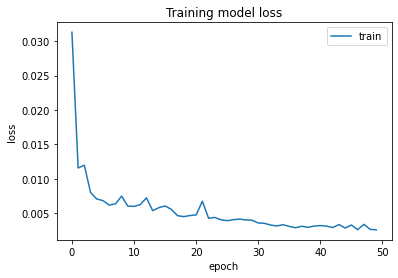

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
testData = pd.read_csv('Google_test_data.csv')     
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 

inputClosing = testData.iloc[:,0:].values        
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60                                    
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[1.2159827],
       [1.2311333],
       [1.299446 ],
       [1.300936 ],
       [1.2655526],
       [1.2121618],
       [1.2012147],
       [1.2208445],
       [1.2628821],
       [1.267455 ],
       [1.1961247],
       [1.1809108],
       [1.203422 ],
       [1.195078 ],
       [1.2248135],
       [1.2280328],
       [1.2844226],
       [1.3017806],
       [1.3064729],
       [1.3234043],
       [1.2382916],
       [1.2513463],
       [1.2201188],
       [1.2210516],
       [1.2453508],
       [1.2697413],
       [1.2673082],
       [1.2283998],
       [1.1758486],
       [1.1833677],
       [1.1870743],
       [1.1686342],
       [1.1172725],
       [1.0945661],
       [1.1790075],
       [1.2247338],
       [1.2141892],
       [1.1965936],
       [1.2056596],
       [1.1692816],
       [1.2388636],
       [1.2675997],
       [1.279559 ],
       [1.2755013],
       [1.2664256],
       [1.2462134],
       [1.22612  ],
       [1.2758359],
       [1.3002194],
       [1.3131486],


In [ ]:
predicted_price = sc.inverse_transform(y_pred)          

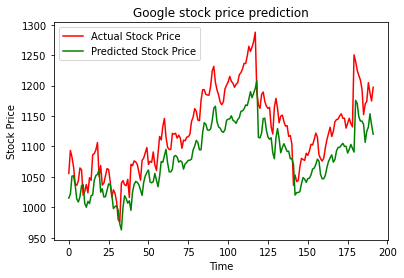

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()